W : Parameter containing:
tensor([[1.5683]], requires_grad=True), b : Parameter containing:
tensor([0.2899], requires_grad=True)
W : Parameter containing:
tensor([[2.9585]], requires_grad=True), b : Parameter containing:
tensor([0.3272], requires_grad=True)
W : Parameter containing:
tensor([[4.3223]], requires_grad=True), b : Parameter containing:
tensor([0.3628], requires_grad=True)
W : Parameter containing:
tensor([[5.6603]], requires_grad=True), b : Parameter containing:
tensor([0.3967], requires_grad=True)
W : Parameter containing:
tensor([[6.9728]], requires_grad=True), b : Parameter containing:
tensor([0.4290], requires_grad=True)
W : Parameter containing:
tensor([[8.2605]], requires_grad=True), b : Parameter containing:
tensor([0.4597], requires_grad=True)
W : Parameter containing:
tensor([[9.5237]], requires_grad=True), b : Parameter containing:
tensor([0.4889], requires_grad=True)
W : Parameter containing:
tensor([[10.7630]], requires_grad=True), b : Parameter containing:
tens

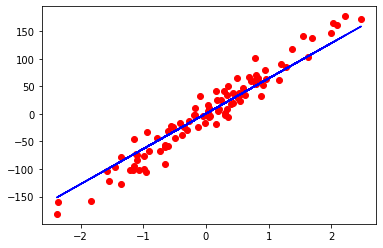

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# Model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 100
for epoch in range(num_epochs):
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    [w, b] = model.parameters()
    print("W : {}, b : {}".format(w, b))

predicted = model(X).detach().numpy()
print("Predicted : {}".format(predicted))

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
